In [41]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [42]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import itertools
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")

from os.path import join, exists, isfile, isdir
from os import makedirs, listdir

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 8}
matplotlib.rc('font', **font)

In [8]:
r

,dataset,exp,algo,C,gamma,time,train_error,val_error,test_error,f1,method,D,n_landmarks,perc_landmarks,beta,mean_max_q,c,b,beta_da
12,moons50,baseline,SVM,0.01000,0.1,28.228045,0.199776,0.194444,0.188889,0.795181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10721,moons50,landmarks,PB,0.00100,0.1,NaN,0.225589,0.097222,0.150000,0.836364,random,16.0,8.0,0.01,0.001,0.062666,NaN,NaN,NaN
10722,moons50,landmarks,PB,0.00100,0.1,NaN,0.225589,0.104167,0.150000,0.836364,random,16.0,8.0,0.01,0.010,0.064183,NaN,NaN,NaN
10723,moons50,landmarks,PB,0.00100,0.1,NaN,0.222222,0.111111,0.155556,0.829268,random,16.0,8.0,0.01,0.100,0.081327,NaN,NaN,NaN
10724,moons50,landmarks,PB,0.00001,0.1,NaN,0.199776,0.159722,0.188889,0.817204,random,16.0,8.0,0.01,1.000,0.368466,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12183,moons50,landmarks,PBDA,1000.00000,0.1,NaN,0.494949,0.416667,0.550000,0.620690,random,8.0,2.0,NaN,1000.000,0.128738,0.01,0.01,NaN
12184,moons50,landmarks,RBF,0.01000,0.1,NaN,0.205387,0.208333,0.233333,0.758621,random,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
12185,moons50,landmarks,RBF,100.00000,0.1,NaN,0.404040,0.375000,0.533333,0.466667,random,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
12186,moons50,landmarks,RBF,0.00010,0.1,NaN,0.228956,0.104167,0.133333,0.846154,random,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
datasets = ["b_to_d", "moons40pbrff","moons10pbrff","moons00","moons10","moons10cv", "moons20","moons30", "moons30nokl", "moons40","moons40cv", "moons50","moons51","moons52", "moons53", "moons57", "moons58","breast", "ads", "adult", "farm", "mnist17", "mnist49", "mnist56"]
experiments = ["baseline", "greedy_kernel", "landmarks_based"]

### Loading results

In [44]:
results_path = join(".", "results")
output_path = join(".", "results", "fig")
if not(exists(output_path)): makedirs(output_path)

In [45]:
def load_dir_results(dir_path):
    dir_results = []
    for f in [f for f in listdir(dir_path) if (isfile(join(dir_path, f)) and f.endswith(".pkl"))]:
        with open(join(dir_path, f), 'rb') as in_file:
            dir_results += pickle.load(in_file)
                
    for d in [d for d in listdir(dir_path) if isdir(join(dir_path, d))]:
        dir_results += load_dir_results(join(dir_path, d))
    
    return dir_results

def load_results(results_path):
    # Loading
    results = []
    for exp in set(listdir(results_path)).intersection(experiments):
        results += load_dir_results(join(results_path, exp))
    results = pd.DataFrame(results)
    return results

In [46]:
results_file = join(output_path, "results.pkl")
if not exists(results_file):
    results = load_results(results_path)
    with open(results_file, 'wb') as out_file:
        pickle.dump(results, out_file)
        
with open(results_file, 'rb') as in_file:
    results = pickle.load(in_file)
results = load_results(results_path)
results_per_dataset = {d:results.loc[results.dataset == d] for d in datasets}

In [47]:
results[(results["dataset"]=='breast') & (results["beta"]==1000.000) & (results["C"]==0.00001)]

,dataset,exp,algo,C,gamma,time,train_error,val_error,test_error,f1,...,D,n_landmarks,perc_landmarks,beta,mean_max_q,c,b,beta_da,val_s_error,val_t_error


In [48]:
results_per_dataset['moons30']

results.loc[results[(results["algo"]=="PBDA") & (results["dataset"]=="moons30")]["test_error"].idxmin()]

#min(results[(results["algo"]=="PBDA") & (results["dataset"]=="moons30")]["test_error"])

dataset             moons30
exp               landmarks
algo                   PBDA
C                       0.1
gamma                   1.0
time                    NaN
train_error        0.040278
val_error               0.0
test_error              0.0
f1                      1.0
method               random
D                      32.0
n_landmarks             8.0
perc_landmarks         0.01
beta                  0.001
mean_max_q          0.03125
c                      10.0
b                      10.0
beta_da                 NaN
val_s_error             NaN
val_t_error             NaN
Name: 5520, dtype: object

In [ ]:
results[(results["algo"]=='PB') & (results["perc_landmarks"]==0.20)]

# Greedy Kernel Learning

In [ ]:
N = 20000
max_D = 5000

%pylab inline
pylab.rcParams['figure.figsize'] = (6, 4)
for d in datasets:
    print(d)
    r = results_per_dataset[d]

    # SVM
    svm_error = list(r.loc[r.algo == 'SVM']['test_error'])[0]
    plt.axhline(y=svm_error, color='r', linestyle='-', linewidth=1, label="SVM RBF")

    # RFF
    r_rff = r.loc[r.algo == 'RFF'].loc[r.D <= max_D].set_index('D')
    plt.semilogx(r_rff['train_error'], "--", label=f"RFF-train",color ='g', linewidth=0.9, alpha=0.4)
    plt.semilogx(r_rff['test_error'], "-", label=f"RFF-test", color ='g', linewidth=1.1)
    
    # Optimized Kernel RFF
    r_okrff = r.loc[r.algo == 'OKRFF'].loc[r.D <= max_D]
    r_okrff = r.loc[r_okrff.groupby(['D'])["val_error"].idxmin()].set_index('D')
    plt.semilogx(r_okrff['train_error'], "--", label=f"OKRFF-train", color ='y', linewidth=0.9,alpha=0.4)
    plt.semilogx(r_okrff['test_error'], "-", label=f"OKRFF-test", color ='y', linewidth=1)
    
    # PAC-Bayes RFF
    r_pbdarff = r.loc[r.algo == 'PBRFF'].loc[r.D <= max_D].sort_values('beta', ascending=False)
    r_pbdarff = r.loc[r_pbdarff.groupby(['D'])["val_error"].idxmin()].set_index('D')
    plt.semilogx(r_pbdarff['train_error'], "--", label=f"PBRFF-train", color ='b', linewidth=0.9,alpha=0.4)
    plt.semilogx(r_pbdarff['test_error'], "-", label=f"PBRFF-test", color ='b', linewidth=1)
    
    sns.despine(top=True, right=True)
    if d in ["mnist49", "mnist17"]:
        leg = plt.legend(frameon=True, fontsize='x-large')
        leg_lines = leg.get_lines()
        plt.setp(leg_lines, linewidth=1.3)
    plt.tight_layout()
    plt.autoscale(enable=True, axis='x', tight=True)
    tick_params(axis='both', which='both', pad=2, direction='in', labelsize=11)
    plt.savefig(join(output_path, f"error_vs_features_{d}.pdf"))
    plt.show()

# Landmarks-Based Learning

####  Test error of the landmarks-based approach

In [ ]:
landmarks_method = 'random'
perc_landmarks = 0.2
beta = 1
D = 64

### SVM ###
svm_results = pd.DataFrame(results.loc[results.algo == 'SVM'].set_index('dataset')['test_error'])\
                                                             .rename(columns={'test_error': 'svm'})

### RBF ###
rbf_results = pd.DataFrame(results.loc[(results.algo == 'RBF') & \
                                       (results.perc_landmarks == perc_landmarks) & \
                                       (results.method == landmarks_method)] \
                                       .set_index('dataset')['test_error']) \
                                       .rename(columns={'test_error': 'rbf'})
### PAC-Bayes ###
pb_results = results.loc[(results.algo == 'PB') & (results.perc_landmarks == perc_landmarks) & \
                         (results.method == landmarks_method)].sort_values('beta', ascending=True)

# beta and D optimized on validation set

pb_results_optimized = pd.DataFrame(pb_results.loc[pb_results.groupby(['method', 'nb_landmarks', 'dataset']) \
                                                  ["test_error"].idxmin()].set_index('dataset')['test_error']) \
                                                  .rename(columns={'test_error': 'pb'})

# beta fixed, D optimized on validation set
pb_results_beta = pb_results.loc[pb_results.beta == beta]
pb_results_beta = pd.DataFrame(pb_results_beta.loc[pb_results_beta.groupby(['method', 'nb_landmarks', 'dataset']) \
                                                  ["test_error"].idxmin()].set_index('dataset')['test_error'])\
                                                  .rename(columns={'test_error': 'pb_beta'})

# beta optimized on validation set, D fixed
pb_results_D = pb_results.loc[pb_results.D == D]
pb_results_D = pd.DataFrame(pb_results_D.loc[pb_results_D.groupby(['method', 'nb_landmarks', 'dataset']) \
                                            ["test_error"].idxmin()].set_index('dataset')['test_error']) \
                                            .rename(columns={'test_error': 'pb_D'})

### PAC-Bayes ###
pbda_results = results.loc[(results.algo == 'PBDA') & (results.perc_landmarks == perc_landmarks) & \
                         (results.method == landmarks_method)].sort_values('beta', ascending=True)

# beta and D optimized on validation set

pbda_results_optimized = pd.DataFrame(pbda_results.loc[pbda_results.groupby(['method', 'nb_landmarks', 'dataset']) \
                                                  ["test_error"].idxmin()].set_index('dataset')['test_error']) \
                                                  .rename(columns={'test_error': 'pbda'})

# beta fixed, D optimized on validation set
pbda_results_beta = pbda_results.loc[pbda_results.beta == beta]
pbda_results_beta = pd.DataFrame(pbda_results_beta.loc[pbda_results_beta.groupby(['method', 'nb_landmarks', 'dataset']) \
                                                  ["test_error"].idxmin()].set_index('dataset')['test_error'])\
                                                  .rename(columns={'test_error': 'pbda_beta'})

# beta optimized on validation set, D fixed
pbda_results_D = pbda_results.loc[pbda_results.D == D]
pbda_results_D = pd.DataFrame(pbda_results_D.loc[pbda_results_D.groupby(['method', 'nb_landmarks', 'dataset']) \
                                            ["test_error"].idxmin()].set_index('dataset')['test_error']) \
                                            .rename(columns={'test_error': 'pbda_D'})


table = svm_results.join(rbf_results).join(pbda_results_optimized).join(pbda_results_beta).join(pbda_results_D).join(pb_results_optimized).join(pb_results_beta).join(pb_results_D)
table = (100*table).round(2).sort_index()
print(table.to_latex())

In [ ]:
pb_results.loc[pb_results.groupby(['method', 'perc_landmarks', 'dataset']) ["test_error"].idxmin()].set_index('dataset')['test_error']
                                              

#### Behavior of the Landmarks-based approach according to the percentage of training points selected as landmarks

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Dataset: moons57


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

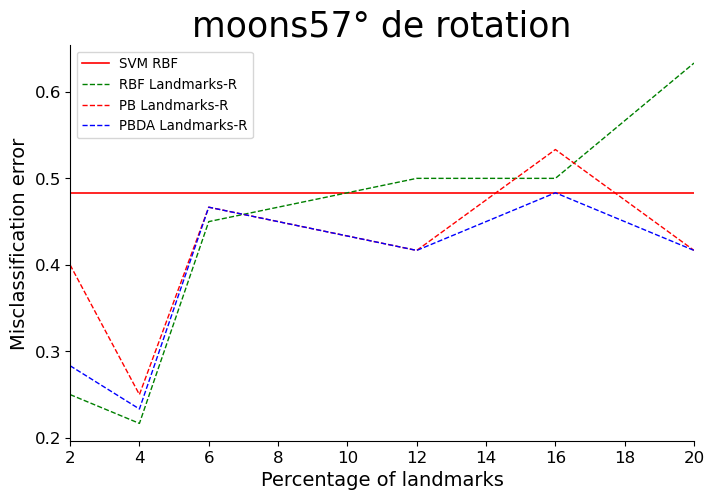

In [50]:
%pylab inline
pylab.rcParams['figure.figsize'] = (7, 5)
datasets=["moons57"]
for d in datasets :
    print(f"Dataset: {d}")
    r = results_per_dataset[d]
    
    ### SVM ###
    svm_error = list(r.loc[r.algo == 'SVM']['test_error'])[0]
    plt.axhline(y=svm_error, color='r', linestyle='-', linewidth=1.2, label="SVM RBF")
    
    ### RBF ###
    r_rbf = r.loc[r.algo == 'RBF'].sort_values('n_landmarks')
    for method in r_rbf.method.unique():
        plt.plot(r_rbf.loc[r_rbf.method == method].set_index(['n_landmarks'])['test_error'], 
                 '--' if method == "random" else "-", 
                 label=f"RBF Landmarks" + ("-R" if method == "random" else "-C"),
                 color = 'g',
                 linewidth=1)

     ### PAC-Bayes ###
    r_pb = r.loc[r.algo == 'PB'].sort_values('n_landmarks', ascending=False).sort_values('beta', ascending=True)

    # Selecting beta and D based on error on the validation set
    r_pb = r_pb.loc[r_pb.groupby(['method', 'n_landmarks'])["val_s_error"].idxmin()]
    for method in r_pb.method.unique():
        plt.plot(r_pb.loc[r_pb.method == method].set_index(['n_landmarks'])['test_error'], 
                 '--' if method == "random" else "-", 
                 label=f"PB Landmarks"  + ("-R" if method == "random" else "-C"),
                 color = 'r',
                 linewidth = 1)
         
    ### PAC-Bayes ###
    r_pbda = r.loc[r.algo == 'PBDA'].sort_values('n_landmarks', ascending=False).sort_values('beta', ascending=True)

    # Selecting beta and D based on error on the validation set
    r_pbda = r_pbda.loc[r_pbda.groupby(['method', 'n_landmarks'])["val_s_error"].idxmin()]
    for method in r_pbda.method.unique():
        plt.plot(r_pbda.loc[r_pbda.method == method].set_index(['n_landmarks'])['test_error'], 
                 '--' if method == "random" else "-", 
                 label=f"PBDA Landmarks"  + ("-R" if method == "random" else "-C"),
                 color = 'b',
                 linewidth = 1)

    plt.title(str(d)+"° de rotation", fontsize=25)
    plt.xlabel("Percentage of landmarks", fontsize=14)
    plt.ylabel("Misclassification error", fontsize=14)
    sns.despine(top=True, right=True)
    plt.tight_layout()
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.tick_params(axis='both', which='both', pad=3, direction='out', labelsize=12)
    plt.legend(frameon=True, fontsize='large')
    if d == "farm":
        plt.legend(frameon=True, fontsize='large')
    elif d == "ads":
        plt.legend(frameon=True, fontsize='large',loc=(0.64, 0.32))
    plt.savefig(join(output_path, f"error_landmarks_{d}.pdf"))
    plt.show()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Dataset: moons57


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

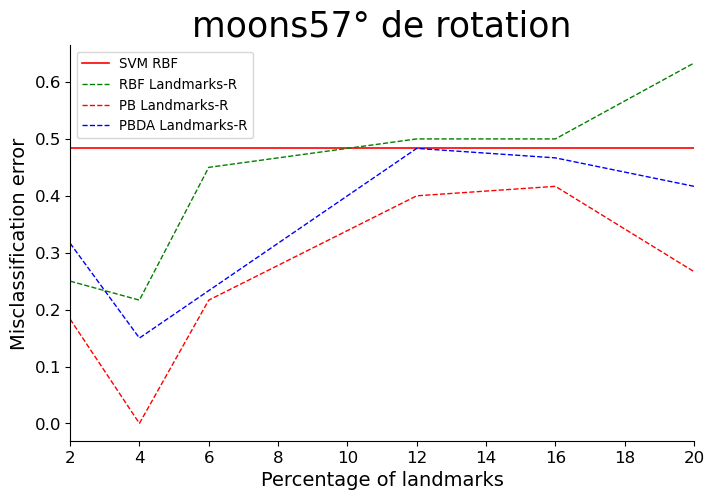

In [52]:
%pylab inline
pylab.rcParams['figure.figsize'] = (7, 5)
datasets=["moons57"]
for d in datasets :
    print(f"Dataset: {d}")
    r = results_per_dataset[d]
    
    ### SVM ###
    svm_error = list(r.loc[r.algo == 'SVM']['test_error'])[0]
    plt.axhline(y=svm_error, color='r', linestyle='-', linewidth=1.2, label="SVM RBF")
    
    ### RBF ###
    r_rbf = r.loc[r.algo == 'RBF'].sort_values('n_landmarks')
    for method in r_rbf.method.unique():
        plt.plot(r_rbf.loc[r_rbf.method == method].set_index(['n_landmarks'])['test_error'], 
                 '--' if method == "random" else "-", 
                 label=f"RBF Landmarks" + ("-R" if method == "random" else "-C"),
                 color = 'g',
                 linewidth=1)

     ### PAC-Bayes ###
    r_pb = r.loc[r.algo == 'PB'].sort_values('n_landmarks', ascending=False).sort_values('beta', ascending=True)

    # Selecting beta and D based on error on the validation set
    r_pb = r_pb.loc[r_pb.groupby(['method', 'n_landmarks'])["val_t_error"].idxmin()]
    for method in r_pb.method.unique():
        plt.plot(r_pb.loc[r_pb.method == method].set_index(['n_landmarks'])['test_error'], 
                 '--' if method == "random" else "-", 
                 label=f"PB Landmarks"  + ("-R" if method == "random" else "-C"),
                 color = 'r',
                 linewidth = 1)
         
    ### PAC-Bayes ###
    r_pbda = r.loc[r.algo == 'PBDA'].sort_values('n_landmarks', ascending=False).sort_values('beta_da', ascending=True)

    # Selecting beta and D based on error on the validation set
    r_pbda = r_pbda.loc[r_pbda.groupby(['method', 'n_landmarks'])["val_t_error"].idxmin()]
    for method in r_pbda.method.unique():
        plt.plot(r_pbda.loc[r_pbda.method == method].set_index(['n_landmarks'])['test_error'], 
                 '--' if method == "random" else "-", 
                 label=f"PBDA Landmarks"  + ("-R" if method == "random" else "-C"),
                 color = 'b',
                 linewidth = 1)

    plt.title(str(d)+"° de rotation", fontsize=25)
    plt.xlabel("Percentage of landmarks", fontsize=14)
    plt.ylabel("Misclassification error", fontsize=14)
    sns.despine(top=True, right=True)
    plt.tight_layout()
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.tick_params(axis='both', which='both', pad=3, direction='out', labelsize=12)
    plt.legend(frameon=True, fontsize='large')
    if d == "farm":
        plt.legend(frameon=True, fontsize='large')
    elif d == "ads":
        plt.legend(frameon=True, fontsize='large',loc=(0.64, 0.32))
    plt.savefig(join(output_path, f"error_landmarks_{d}.pdf"))
    plt.show()

In [ ]:
r = results_per_dataset
    
    ### SVM ###
svm_error = list(r.loc[r.algo == 'PB']['test_error'])[0]
svm_error

In [ ]:
results_per_dataset["moons30nokl"]

In [ ]:

results.loc[results[(results["algo"]=="PB") & (results["dataset"]=="moons30")]["test_error"].idxmin()]
#results.loc[results[(results["algo"]=="PBDA") & (results["dataset"]=="moons40cv")]["test_error"].idxmin()]

In [ ]:
results[(results["algo"]=="PBDA") & (results["dataset"]=="moons40cv")]

results.loc[results[(results["algo"]=="PBDA") & (results["dataset"]=="moons30")]["test_error"].idxmin()]

In [ ]:
results_per_dataset["moons30"]

In [ ]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()